In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df.shape

(6497, 13)

In [5]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

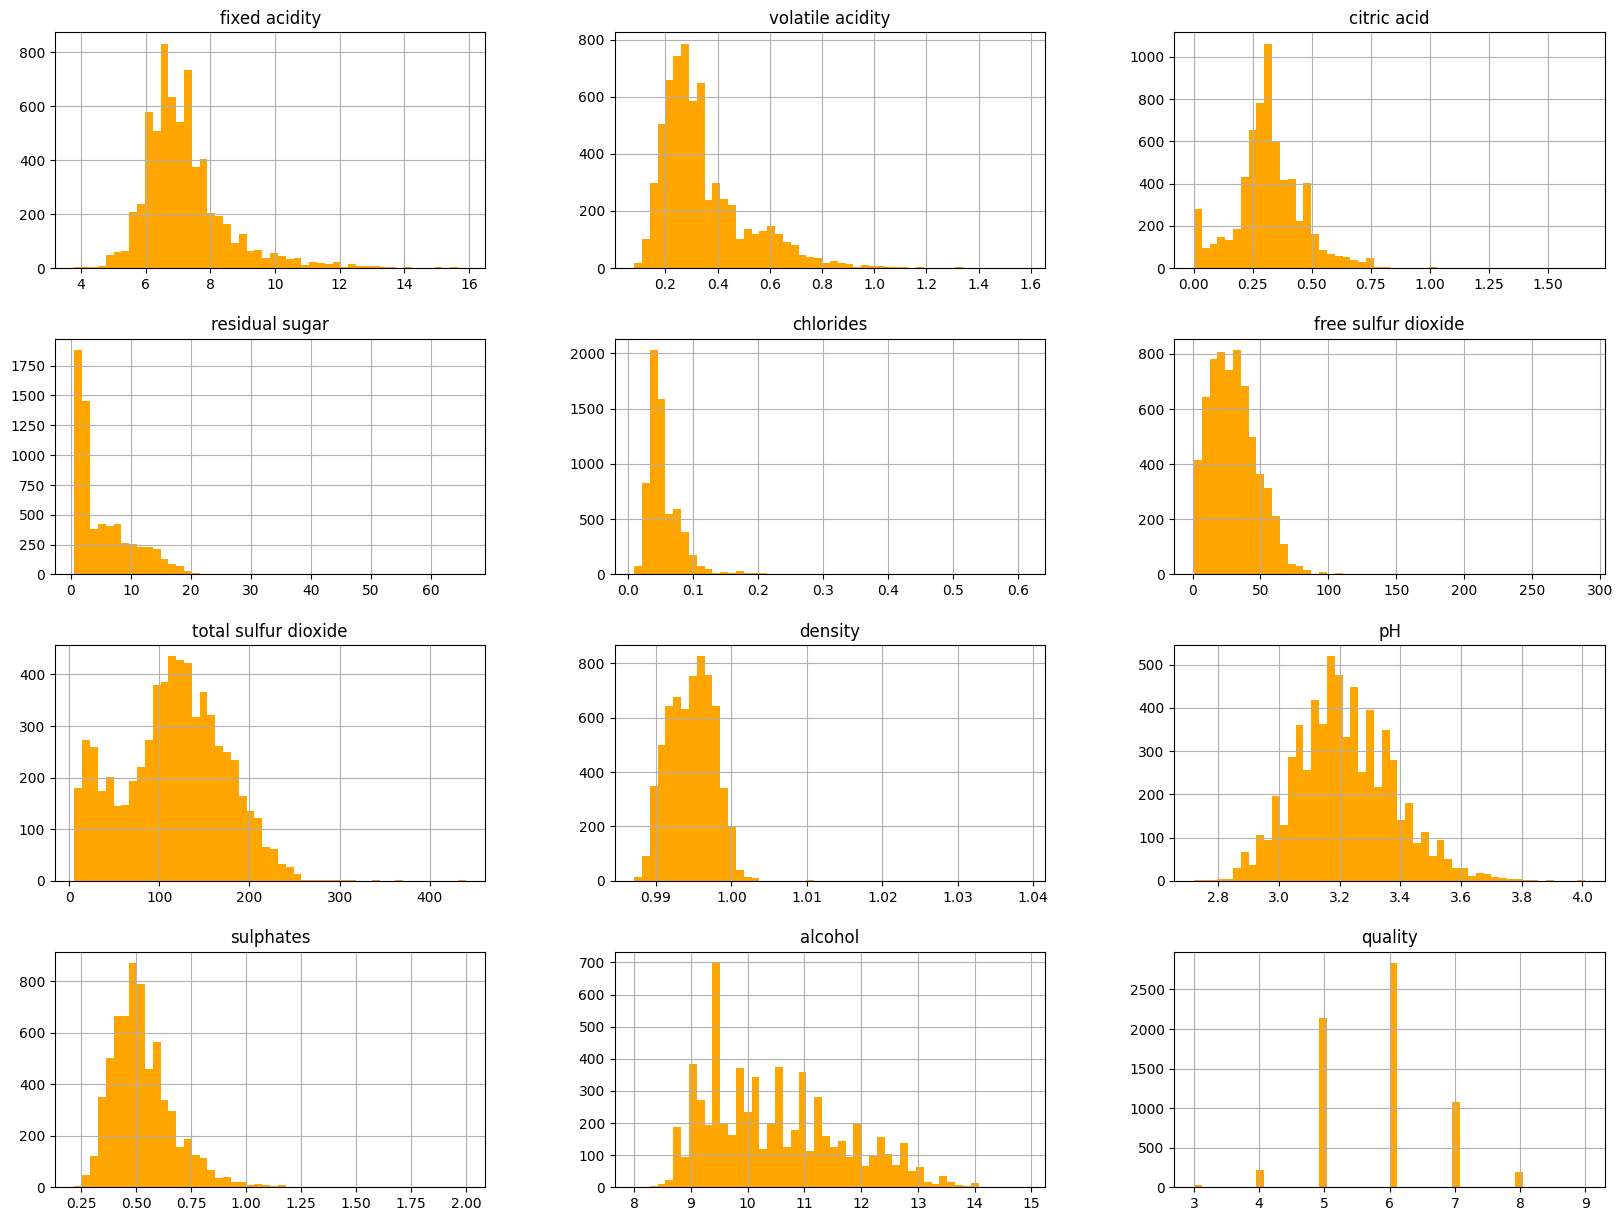

In [6]:
import matplotlib.pyplot as plt

df.hist(bins = 50, figsize=(20,15), color = "orange")
plt.show()

In [7]:
df = df.drop(["type"], axis = 1)
df.shape

(6497, 12)

In [8]:
df = df.dropna()
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df.shape

(6463, 12)

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(["quality"],axis=1) 
y = df["quality"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5170, 11)
(1293, 11)
(5170,)
(1293,)


In [13]:
from sklearn.linear_model import ElasticNet

In [14]:
lr = ElasticNet(alpha = 0.1, l1_ratio = 0.5, random_state = 11)
lr.fit(X_train, y_train)

ElasticNet(alpha=0.1, random_state=11)

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)

    return rmse, mae, r2

In [18]:
pred_val = lr.predict(X_test)
pred_val

array([5.85801191, 5.40436489, 5.5082751 , ..., 5.37258234, 5.60984279,
       5.86816322])

In [20]:
(rmse, mae, r2) = eval_metrics(y_test, pred_val)
print("RMSE is: ",rmse)
print("MAE is: ", mae)
print("R2 score is: ", r2)

RMSE is:  0.7548107268666319
MAE is:  0.5945562787670226
R2 score is:  0.24613699580476867
